# CS541: Applied Machine Learning, Spring 2025, Problem Set 5

### _Note: Do not delete or add blocks, do not change the function names. If you do this the autograder won't run properly and you might get a 0. Avoid using global variables inside your function. Failing to define your variables correctly could result in a score of 0._


Problem set 5 is due in Gradescope on **Apr 29th at 11:59pm**.
All the questions are in this jupyter notebook file. There are four questions in this assignment, each of which could have multiple parts and consists of a mix of coding and short answer questions. This assignment is worth a total of **95 points** (**52.5 pts** coding, and **42.5 pts** short answer).

After completing these questions you will need to covert this notebook into a .py file named **ps5.py** and a pdf file named **ps5.pdf** in order to submit it (details below).


**Submission instructions:** please upload your completed solution files to Gradescope by the due date. **Make sure you have run all code cells and rendered all markdown/Latex without any errors.**

There will be three separate submission links for the assignment:
1. Submit **ps5.py** to `PS5-Code`
2. Submit **ONLY your typed code** to `PS5-Typed Code`.
  + The .py file should contain **ONLY your typed code** (Do not include any other code apart from what you coded for the assignment).
  + The .py should not contain any written answers. Only the code you wrote.
  + If your typed code falls under a function definition thats predefined by us, **ONLY include your typed code** and nothing else.
  + For each cell block within colab/jupyter that you typed your ocde in, Add 2 new lines ("\n") before pasting your typed code in the .py file.
  + Please name the .py file your actual name.

3. Submit a single `.pdf` report that contains your work for all written questions to `PS5`. You can type your responses in LaTeX, or any other word processing software.  You can also hand write them on a tablet, or scan in hand-written answers. If you hand-write, please make sure they are neat and legible. If you are scanning, make sure that the scans are legible. Lastly, convert your work into a `PDF`. You can use Jupyter Notebook to convert the formats:
  + Convert to PDF file: Go to File->Download as->PDF
  + Convert py file: Go to File->Download as->py\
You can take a look at an example [here](https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps1/convert_py.gif)

  Your written responses in the PDF report should be self-contained. It should include all the output you want us to look at. **You will not receive credit for any results you have obtained, but failed to include directly in the PDF report file.  Please tag the reponses in your PDF with the Gradescope questions outline  as described in [Submitting an Assignment](https://youtu.be/u-pK4GzpId0). Failure to follow these instructions will result in a loss of points.**

  



**Assignment Setup**

You are strongly encouraged to use [Google Colab](https://colab.research.google.com/) for this assignment.

If you would prefer to setup your code locally on your own machine, you will need [Jupyter Notebook](https://jupyter.org/install#jupyter-notebook) or [JupyterLab](https://jupyter.org/install#jupyterlab) installation. One way to set it up is to install “Anaconda” distribution, which has Python (you should install python version >= 3.9 as this notebook is tested with python 3.9), several libraries including the Jupyter Notebook that we will use in class. It is available for Windows, Linux, and Mac OS X [here](https://docs.conda.io/en/latest/miniconda.html).

If you are not familiar with Jupyter Notebook, you can follow [this blog](https://realpython.com/jupyter-notebook-introduction/) for an introduction.  After developing your code using Jupyter, you are encouraged to test it on Google Colab to ensure it works in both settings.


You cannot use packages other than the ones already imported in this assignment.

**Jupyter Tip 1**: To run a cell, press `Shift+Enter` or click on "play" button above. To edit any code or text cell [double] click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

**Jupyter Tip 2**: Use shortcut "Shift + Tab" to show the documentation of a function in Jupyter Notebook/ Jupterlab. Press Shift then double Tab (i.e., press Tab twice) to show the full documentation.\
For example, type `sum(` then Shift + Tab to show the documentation for the function, as shown in this the picture below.

In [1]:
## import some libraries
import numpy as np
from typing import Tuple, List, Dict
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from IPython.display import display
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset

# **Question 1.** Autoencoder (*45 total points*)

In this question, you will build and train an autoencoder model using the MNIST dataset. The MNIST dataset is a collection grayscale images of handwritten digits ranging from 0 to 9 commonly used for image classification tasks.

An autoencoder is a neural network that learns to compress the input data into a lower-dimensional representation (encoding) and then reconstruct it back to its original form (decoding). It consists of the following two major components:

**Encoder**: compresses the input images into lower-dimensional representation.

**Decoder**: takes the encoded representation and reconstructs an output as close as possible to the original input image.


## **1.1 Code:** Data Transformation *(2.5 pts)*

For the following sections, we will work on [MNIST](https://www.kaggle.com/datasets/hojjatk/mnist-dataset) dataset.



First, let's download and preprocess the dataset

In [2]:
def question_1_1() -> transforms.Compose:
    """
    Create and return a transformation pipeline for image preprocessing.
    """
    # Write your code in this block -----------------------------------------------------------

    ## Step 1: Use transforms.Compose
    # 1. resize images to 28x28 pixels.
    # 2. convert the image to a PyTorch tensor.
    transform = transforms.Compose([
        transforms.Resize((28, 28)),  # Resize to 28x28
        transforms.ToTensor(),        # Convert to Tensor
    ])

    ## Return the transformation pipeline
    return transform
    # End of your code -----------------------------------------------------------



We will now create the dataloaders for training and testing.

In [3]:

# Load the MNIST dataset for training and testing using batch size of 16
transform = question_1_1()
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 16.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 497kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.96MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.03MB/s]


## **1.2 Code:** Constructing Autoencoder *(5 pts)*

In [4]:
import torch.nn as nn
from torch import Tensor

class Autoencoder(nn.Module):
    def __init__(self, encoding_dim: int):

        super().__init__()

        # Write your code in this block -----------------------------------------------------------

        # Initialize self.encoder and self.decoder based on the given output
        # (note the dimension for in_features and out_features)

        # Construct encoder using following steps:
        # 1. Apply a linear layer with 784 input features and 128 output features.
        # 2. Add a ReLU activation function.
        # 3. Apply a second linear layer that reduces the representation from 128 features to encoding_dim

        self.encoder = nn.Sequential(
            nn.Linear(784,128),
            nn.ReLU(),
            nn.Linear(128, encoding_dim)
        )

        # Construct decoder using following steps:
        # 1. Apply a linear layer with encoding_dim features and 128 output features.
        # 2. Add a ReLU activation function.
        # 3. Apply a second linear layer from 128 features to 784 features
        # 4. Apply a sigmoid layer.

        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 784),
            nn.Sigmoid()
        )

    def forward(self, x: Tensor) -> Tensor:
        """
        Forward pass for the autoencoder.
        x: Input tensor of shape (batch_size, 1, 28, 28).
        Returns the reconstructed tensor of the same shape (batch_size, 1, 28, 28)..
        """
        # Flatten the input image to shape (batch_size,28*28)
        batch_size = x.size(0)
        x = x.view(batch_size, -1)

        x = self.encoder(x)
        x = self.decoder(x)

        x = x.view(batch_size, 1, 28, 28)
        return x


        # End of your code ------------------------------------------------------------------------

# Example of instantiating the model
encoding_dim = 64
model = Autoencoder(encoding_dim)
print(model)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Sigmoid()
  )
)


For training we need to first create `model` and set its device. We will use GPU if it's available, otherwise CPU.  For `optimizer` we will use Adam and set the initial learning rate as 0.001.

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoding_dim = 64
model = Autoencoder(encoding_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

## **1.3 Code:** Training Autoencoder *(5 pts)*

Now, let us write the function to train an autoencoder model.

In [6]:
def question_1_3(model: nn.Module, dataloader: DataLoader, criterion, optimizer, epochs) -> None:
    """
    Train an autoencoder model on a given dataset.

    Args:
    - model (nn.Module): The autoencoder model to be trained
    - dataloader (DataLoader): Dataloader for trianing
    - criterion: Loss function
    - optimizer: Optimizer
    - epochs: NUmber of trianing epochs

    """


    # Write your code in this block -----------------------------------------------------------
    ## Set training mode
    model.train()

    ## Loop through each epoch
    for epoch in range(epochs):
        total_loss = 0.0
        for images, _ in dataloader:
            images = images.to(device)

            # Forward pass
            reconstructed_images = model(images)

            # Zero the gradients, backpropagate, and update the weights
            optimizer.zero_grad()
            loss = criterion(reconstructed_images, images)
            loss.backward()
            optimizer.step()

            # Update the loss
            total_loss += loss.item()


        # Compute average loss over the epoch  and print out the loss
        avg_loss = total_loss / len(dataloader)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")
    # End of your code ------------------------------------------------------------------------


## **1.4 Short answer:**  Deciding Loss Function *(2.5 pts)*

When training the model, experiment with different loss functions as the criterion. Choose the most suitable loss function for the task and explain why it is the best choice.

In [7]:
# Write your code in this block -----------------------------------------------------------
# invoke question_1_3 here, try out at least 2 loss functions, and leave one for the test set below

criterion = nn.BCELoss()

train_model = question_1_3

Write your answer in this block

**Answer:**
I have experimented with different loss functions such as Mean Squared Error (MSE) and Binary Cross-Entropy (BCE). The most suitable loss function for the task is BCE. Because the task is MNIST digit reconstruction, which involves binary pixel values (0 or 1). BCE is more appropriate for binary classification tasks, as it measures the difference between the predicted and actual binary values. MSE, on the other hand, is more suitable for regression tasks where the output can take continuous values.
From the visualization below we can see that within 10 epoches the output image is very close to the input image using BCE. However using MSE the output images are more like noise.

Now, let us evaluate the performance of the autoencoder using the test set.

In [8]:
def evaluate_model(model: nn.Module, dataloader: DataLoader) -> float:
    """
    Evaluate an autoencoder model on a given dataset.

    Args:
    - model (nn.Module): The autoencoder model to be evaluated
    - dataloader (DataLoader): Dataloader for evaluation

    Returns:
    - float: Average loss over the evaluation dataset
    """

    ## Set the model to evaluation mode
    model.eval()
    total_loss = 0.0

    ## Disable gradient calculation
    with torch.no_grad():
        for images, _ in dataloader:
            images = images.to(device)
            outputs = model(images)
            loss = criterion(outputs, images)

    # Calculate total_loss
            total_loss += loss.item()

    # Calculate average loss over the entire evaluation dataset and print out the loss
    avg_loss = total_loss / len(dataloader)
    print(f"Test Loss: {avg_loss:.4f}")



    return avg_loss


In [ ]:
question_1_3(model, train_loader, criterion, optimizer, epochs=5)
evaluate_model(model, test_loader)

Epoch [1/5], Loss: 0.1287
Epoch [2/5], Loss: 0.0888
Epoch [3/5], Loss: 0.0822
Epoch [4/5], Loss: 0.0790
Epoch [5/5], Loss: 0.0770
Test Loss: 0.0756


0.07564237496852874

To visualize the performance of the current autoencoder run the following block:

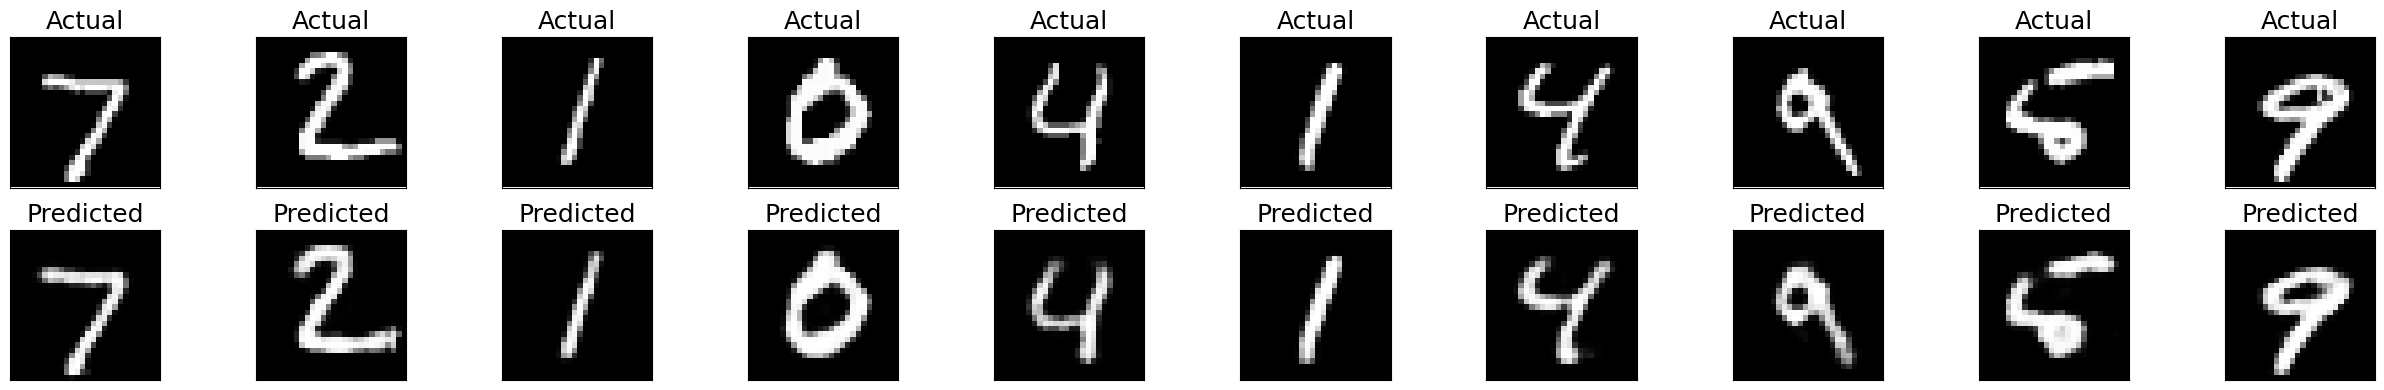

In [ ]:
import matplotlib.pyplot as plt
dataiter = iter(test_loader)
images, labels = next(dataiter)

images_flatten = images.view(images.size(0), -1)
output = model(images_flatten)
images = images.numpy()


output = output.view(16, 1, 28, 28)
output = output.detach().numpy()

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25, 4))

row_titles = ["Actual", "Predicted"]
for images_set, row, title in zip([images, output], axes, row_titles):
    for img, ax in zip(images_set, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.set_title(title, fontsize=18)  # Set "Actual" or "Predicted" as title for each subfigure
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

## **1.5 Short answer:** Adding Layers to Autoencoder *(10 pts)*
Try **three** different ways of adding a layer to the encoder and a layer to the decoder and retrain it. Do they get better? Discuss what you learn from the results.

In [ ]:
## -- ! code required --your solution(s)
class Autoencoder_new(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder_new, self).__init__()

        # Try different ways of adding layers to your encoder and decoder
        self.encoder = nn.Sequential(
        # Write your code in this block -----
            # Way 1
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, encoding_dim)

            # Way 2
            # nn.Linear(784, 128),
            # nn.ReLU(),
            # nn.Linear(128, 64),
            # nn.ReLU(),
            # nn.Linear(64, encoding_dim)

            # Way 3
            # nn.Linear(784, 512),
            # nn.ReLU(),
            # nn.Linear(512, 256),
            # nn.ReLU(),
            # nn.Linear(256, 128),
            # nn.ReLU(),
            # nn.Linear(128, encoding_dim)

        # End of your code --------
        )

        self.decoder = nn.Sequential(
        # Write your code in this block -----
            # Way 1
            nn.Linear(encoding_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Sigmoid()

            # Way 2
            # nn.Linear(encoding_dim, 64),
            # nn.ReLU(),
            # nn.Linear(64, 128),
            # nn.ReLU(),
            # nn.Linear(128, 784),
            # nn.Sigmoid()

            # Way 3
            # nn.Linear(encoding_dim, 256),
            # nn.ReLU(),
            # nn.Linear(256, 784),
            # nn.Sigmoid()
        # End of your code --------
        )

    def forward(self, x):
        # Write your code in this block -----
        batch_size = x.size(0)
        x = x.view(batch_size, -1)

        encoded = self.encoder(x)
        decoded = self.decoder(encoded)

        decoded = decoded.view(batch_size, 1, 28, 28)
        # End of your code --------

        return decoded


encoding_dim = 64
model_new = Autoencoder_new(encoding_dim)
optimizer_new = optim.Adam(model_new.parameters(), lr=0.001)

print(model_new)
train_model(model_new, train_loader, criterion, optimizer_new, epochs=5)
evaluate_model(model_new, test_loader)

Autoencoder_new(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=784, bias=True)
    (5): Sigmoid()
  )
)
Epoch [1/5], Loss: 0.1464
Epoch [2/5], Loss: 0.1027
Epoch [3/5], Loss: 0.0941
Epoch [4/5], Loss: 0.0900
Epoch [5/5], Loss: 0.0872
Test Loss: 0.0868


0.08675663224458695

Write your answer in this block

**Answer:**
I tried three methods above to add an extra layer to the encoder and decoder. The original model is better. All three models had a test loss around 0.85, while the original model achieved a lower test loss of 0.75. This shows that adding layers made the models more complex but did not improve performance, and the simpler original model generalized better. And it could also be due to that the new model needs more epochs to converge.

## **1.6 Short answer:** Decoding Training Data *(10 pts)*

Determine the mean and covariance of the samples from our training data. Now
draw 10 random samples from a normal distribution with that mean and
covariance, and feed these samples into the decoder. Do the results look
like images?

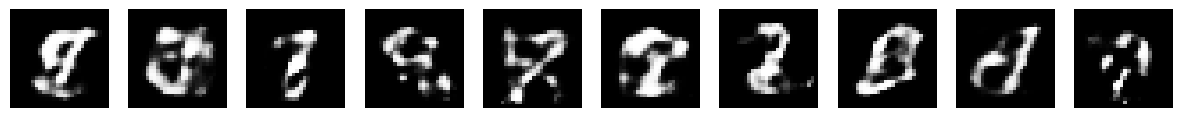

In [ ]:
## -- ! code required --your solution(s)

# Step 1: Collect samples from training data
model.eval()
all_latent_codes = []

with torch.no_grad():
    for images, _ in train_loader:
        images = images.to(device)
        batch_size = images.size(0)
        images = images.view(batch_size, -1)
        latent_codes = model.encoder(images)
        all_latent_codes.append(latent_codes.cpu())

all_latent_codes = torch.cat(all_latent_codes, dim=0)
# Step 2: Calculate mean and covariance of the input samples
mean = all_latent_codes.mean(dim=0)
covariance = torch.from_numpy(np.cov(all_latent_codes.T.numpy()))

# Step 3: Sample from the normal distribution with calculated mean and covariance
num_samples = 10
latent_samples = np.random.multivariate_normal(mean.numpy(), covariance.numpy(), num_samples)
latent_samples = torch.from_numpy(latent_samples).float().to(device)

# Step 4: Decode samples and visualize
with torch.no_grad():
    decoded_samples = model.decoder(latent_samples)
    decoded_samples = decoded_samples.view(num_samples, 1, 28, 28).cpu()

# Plot the generated images
fig, axes = plt.subplots(1, num_samples, figsize=(15, 2))
for i, ax in enumerate(axes):
    ax.imshow(decoded_samples[i].squeeze(), cmap='gray')
    ax.axis('off')
plt.show()

Write your answer in this block

**Answer:**
No they do not look like images.

## **1.7 Short answer:** Decoding using Mixture of Normals *(10 pts)*

We will now model the images using a mixture of normals. For each digit class, determine the mean and covariance based on the training data.
Your mixture distribution that samples evenly from the ten class distributions. Now draw 10 random samples from this mixture distribution,
and feed these samples into the decoder. Do the results look like images?

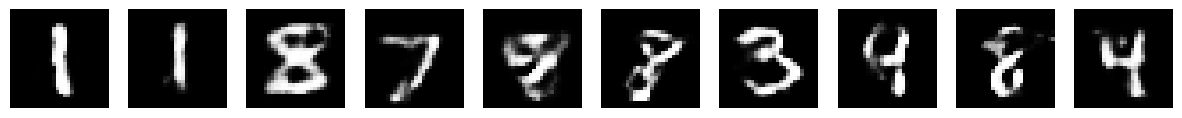

In [ ]:
## -- ! code required --your solution(s)


# Step 1: Calculate mean and covariance for each class
model.eval()
latent_codes_by_class = {i: [] for i in range(10)}

with torch.no_grad():
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        batch_size = images.size(0)
        images = images.view(batch_size, -1)
        latent_codes = model.encoder(images)

        for i in range(batch_size):
            label = labels[i].item()
            latent_codes_by_class[label].append(latent_codes[i].cpu())

# Step 2: Calculate the mean and covariance for each class
class_means = {}
class_covariances = {}

for label in range(10):
    latent_tensor = torch.stack(latent_codes_by_class[label], dim=0)
    mean = latent_tensor.mean(dim=0)
    covariance = torch.from_numpy(np.cov(latent_tensor.T.numpy()))
    class_means[label] = mean
    class_covariances[label] = covariance

# Step 3: Create the mixture model and draw the samples
samples = []
num_samples = 10

for _ in range(num_samples):
    random_class = np.random.choice(10)

    sampled = np.random.multivariate_normal(
        class_means[random_class].numpy(),
        class_covariances[random_class].numpy()
    )
    samples.append(sampled)

samples = torch.from_numpy(np.stack(samples)).float().to(device)

with torch.no_grad():
    generated_images = model.decoder(samples)
    generated_images = generated_images.view(-1, 1, 28, 28).cpu()

# Plot the generated images
fig, axes = plt.subplots(1, num_samples, figsize=(15, 2))
for i, ax in enumerate(axes):
    ax.imshow(generated_images[i].squeeze(), cmap='gray')
    ax.axis('off')
plt.show()

Write your answer in this block

**Answer:**
Yeah, they look like real digits.

# **Question 2.** Attention  (*25 total points*)

In this question we will look at how we can apply the attention mechanism to a CNN model. We will reuse the MNIST dataset from question 1. In this question we will look at how using attention mechanism with a basic CNN network can affect the performance of our classification task.

## **2.1 Code:** Basic Attention *(10 pts)*

In this question we will provide you with the BasicCNN network that you will work with.

Let us first look at how attention is calculated:

![alt text](https://github.com/ellywang66/CS541/raw/main/attention.png)

For the attention mechanism, the components $Q$, $K$, and $V$ represent the **query**, **key**, and **value** matrices, derived from the input data. Below is a breakdown of each step:

- **$QK^T$**:computes a **similarity score matrix** by taking the dot product between each query and key vector. This matrix measures how each element (token) should focus on every other element in the input sequence.

- **$\sqrt{d_k}$**: Dividing by the square root of $d_k$ scales down the dot product values to stabilize the training process by preventing large values and avoid gradient explosion.

- **softmax**: The softmax function is applied to the scaled similarity scores by converting each value into probability.

- **$V$**: multiply attention weight by $V$ to compute the final attention output.

For basic attention it will attend to elements in one sequence based on their relevance to a specific context or query where 𝑄
 comes from the target sequence and 𝐾,𝑉 are from the source sequence.For this uestion we will simply let query be a **learnable parameter**.

In [9]:
# the BasicCNN model
class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        return x

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

# Complete SimpleAttention
class BasicAttention(nn.Module):
    def __init__(self, query_dim, key_dim, value_dim, output_dim):
        super(BasicAttention, self).__init__()

        ## TODO: initialize the query,key and value using linear layers where both the input and output dimension is 128.
        self.query = nn.Linear(query_dim, output_dim)
        self.key = nn.Linear(key_dim, output_dim)
        self.value = nn.Linear(value_dim, output_dim)


    def forward(self, query_input, key_input, value_input):
        ## TODO: calculate Q, K, and V using  query_input, key_input, value_input.
        Q = self.query(query_input)
        K = self.key(key_input)
        V = self.value(value_input)

        #calculate attention score
        attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / (K.size(-1) ** 0.5)
        attention_weights = torch.softmax(attention_scores, dim=-1)

        # apply attention weights to V
        output = torch.matmul(attention_weights, V)

        #return attention output
        return output


class CNNWithBasicAttention(nn.Module):
    def __init__(self):
        super(CNNWithBasicAttention, self).__init__()
        self.cnn = BasicCNN()
        ## TODO: initialize self.attention where query, key, value and output dimension are all 128.
        self.attention = BasicAttention(query_dim=128, key_dim=128, value_dim=128, output_dim=128)

        # Initialize a learnable query vector for basic attention
        self.query_vector = nn.Parameter(torch.randn(1, 128))

        ## Initialize final fully connected layer for the classification head using linear layer.
        self.fc = nn.Linear(128, 10)


    def forward(self, x):
         ## TODO: we will pass the input x through cnn followed by the attention layer and the fully connected layer
        x = self.cnn(x)
        x = x.unsqueeze(1)
        attended = self.attention(self.query_vector, x, x)
        attended = attended.squeeze(1)
        x = self.fc(attended)
        return x

In [11]:
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')


def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Test Accuracy: {100 * correct / total:.2f}%')

We can now test the performance of our model

In [ ]:
# Train and evaluate the model
model = CNNWithBasicAttention()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_model(model, train_loader, criterion, optimizer, epochs=5)
test_model(model, test_loader)

Epoch 1/5, Loss: 0.1284
Epoch 2/5, Loss: 0.0462
Epoch 3/5, Loss: 0.0296
Epoch 4/5, Loss: 0.0226
Epoch 5/5, Loss: 0.0187
Test Accuracy: 99.03%


## **2.2 Code:** Self-Attention *(10 pts)*

In self attention the attention score is computed solely based on the input sequence without additional learned parameters. The attention socre is computed solely based on the input sequence without any additional learned parameters.

In [12]:


# Step 2: Define a Self-Attention Layer
class SelfAttention(nn.Module):
    def __init__(self, input_dim):
        super(SelfAttention, self).__init__()
        ## TODO: initialize the query,key and value using linear layers where both the input and output dimension is 128.
        self.query = nn.Linear(input_dim, input_dim)
        self.key = nn.Linear(input_dim, input_dim)
        self.value = nn.Linear(input_dim, input_dim)

    def forward(self, x):
        ## TODO: calculate Q, K, and V using  query_input, key_input, value_input.
        Q = self.query(x)
        K = self.key(x)
        V = self.value(x)
        # calculate attention score
        attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / (K.size(-1) ** 0.5)
        # multiply attention scores by the value matrix
        attention_weights = torch.softmax(attention_scores, dim=-1)
        output = torch.matmul(attention_weights, V)
        # return attention output
        return output


class CNNWithSelfAttention(nn.Module):
    def __init__(self):
        super(CNNWithSelfAttention, self).__init__()
        self.cnn = BasicCNN()
        ## TODO: initialize self.attention where the input dimension 128.
        self.attention = SelfAttention(input_dim=128)
        ## Initialize final fully connected layer for the classification head using linear layer.
        self.fc = nn.Linear(128, 10)

    def forward(self, x):
         ## TODO: we will pass the input x through cnn followed by the attention layer and the fully connected layer
        x = self.cnn(x)
        x = x.unsqueeze(1)
        attended = self.attention(x)
        attended = attended.squeeze(1)
        x = self.fc(attended)
        return x





# Instantiate and train the model
model = CNNWithSelfAttention()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Run training and testing
train_model(model, train_loader, criterion, optimizer, epochs=5)
test_model(model, test_loader)

Epoch 1/5, Loss: 0.1346
Epoch 2/5, Loss: 0.0474
Epoch 3/5, Loss: 0.0335
Epoch 4/5, Loss: 0.0246
Epoch 5/5, Loss: 0.0206
Test Accuracy: 98.91%


## **2.3 Short answer:** Basic attention vs self-attention *(5 pts)*

Compare the performance of basic attention and self-attention. Which one do you think performs better and why?

Write your answer in this block

**Answer:**
Basic attention performs better than self-attention with test accuracy of 99.03% and 98.91% respectively. This is because basic attention uses a learnable parameter for the query, allowing it to adapt to the specific context of the input data. In contrast, self-attention relies solely on the input sequence, which may not capture the same level of contextual information. As a result, basic attention can better focus on relevant features in the input data, leading to improved performance in classification tasks.

# **Question 3** : ViT *(20 points)*


## **3.1 Code:** Multi-head self-attention *(10 pts)*
Begin by implementing multiheaded self-attention. Do **not** use any `for` loops, and instead put all of the calculations into [batch matrix multiplications](https://pytorch.org/docs/stable/generated/torch.bmm.html) or [Linear layers](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).

Useful references include the lecture slides and the [illustrated transformer](https://jalammar.github.io/illustrated-transformer/).


In [13]:
from torch import nn
import torch
import math

class MSA(nn.Module):
  def __init__(self, input_dim, embed_dim, num_heads):
    '''
    input_dim: Dimension of input token embeddings
    embed_dim: Dimension of internal key, query, and value embeddings
    num_heads: Number of self-attention heads
    '''

    super().__init__()

    self.input_dim = input_dim
    self.embed_dim = embed_dim
    self.num_heads = num_heads

    ### Implement the variables

    self.K_embed = nn.Linear(input_dim, embed_dim)
    self.Q_embed = nn.Linear(input_dim, embed_dim)
    self.V_embed = nn.Linear(input_dim, embed_dim)
    self.out_embed = nn.Linear(embed_dim, embed_dim)

    ### Code End

  def forward(self, x):
    '''
    x: input of shape (batch_size, max_length, input_dim)
    return: output of shape (batch_size, max_length, embed_dim)
    '''

    batch_size, max_length, given_input_dim = x.shape
    assert given_input_dim == self.input_dim
    assert max_length % self.num_heads == 0

    # You shouldn't need to initialize any new modules. Everything you need is
    # already in __init__

    # HINT: If you're stuck on how to handle multiple heads without for loops, try to
    # reshape matrix such that the batch_size is num_heads * batch_size
    # e.g. if you have two heads, you'd be doing self-attention twice per instance
    # in the batch, so you essentially have batch_size * 2

    # HINT 2: Feel free to reference: https://d2l.ai/chapter_attention-mechanisms-and-transformers/multihead-attention.html
    # although make sure you understand what each command does

    # this implementation projects KQV before splitting into multiple heads
    # but you can also split into multiple heads first

    # compute KQV as a whole, embedding and
    x = x.reshape(batch_size * max_length, -1)
    K = self.K_embed(x).reshape(batch_size, max_length, self.embed_dim) # (batch_size, max_length, embed_dim)
    Q = self.Q_embed(x).reshape(batch_size, max_length, self.embed_dim)
    V = self.V_embed(x).reshape(batch_size, max_length, self.embed_dim)


    indiv_dim = self.embed_dim // self.num_heads


    ## Implement the variables
    # TODO: split each KQV into heads, by reshaping each into (batch_size, max_length, self.num_heads, indiv_dim)
    K = self.K_embed(x).reshape(batch_size, max_length, self.num_heads, indiv_dim)
    Q = self.Q_embed(x).reshape(batch_size, max_length, self.num_heads, indiv_dim)
    V = self.V_embed(x).reshape(batch_size, max_length, self.num_heads, indiv_dim)

    K = K.permute(0, 2, 1, 3) # (batch_size, num_heads, max_length, embed_dim / num_heads)
    Q = Q.permute(0, 2, 1, 3)
    V = V.permute(0, 2, 1, 3)


    ## Implement the variables

    K = K.reshape(batch_size * self.num_heads, max_length, indiv_dim)
    Q = Q.reshape(batch_size * self.num_heads, max_length, indiv_dim)
    V = V.reshape(batch_size * self.num_heads, max_length, indiv_dim)

    # transpose and batch matrix multiply
    K_T = K.permute(0, 2, 1) # This is our K transposed so we can do a simple batched matrix multiplication (see torch.bmm for more details and the quick solution)
    QK = torch.bmm(Q, K_T) # TODO: Compute the weights before dividing by square root of d (batch_size * num_heads, max_length, max_length)

    weights = QK / math.sqrt(indiv_dim)
    weights = torch.softmax(weights, dim=-1)

    # TODO get weighted average... see torch.bmm for a one line solution
    w_V = torch.bmm(weights, V) # weights is (batch_size * num_heads, max_length, max_length) and V is (batch_size * self.num_heads, max_length, indiv_dim), so we want the matrix multiple of weights @ V

    # rejoin heads
    w_V = w_V.reshape(batch_size, self.num_heads, max_length, indiv_dim)
    w_V = w_V.permute(0, 2, 1, 3) # (batch_size, max_length, num_heads, embed_dim / num_heads)
    w_V = w_V.reshape(batch_size, max_length, self.embed_dim)

    out = self.out_embed(w_V)

    return out


In [14]:
class CNNWithMSA(nn.Module):
    def __init__(self):
        super(CNNWithMSA, self).__init__()
        self.cnn = BasicCNN()
        ## TODO: initialize 1-head MSA where the input and embedding dimension 128.
        self.self_attention = MSA(input_dim=128, embed_dim=128, num_heads=1)
        ## Initialize final fully connected layer for the classification head using linear layer.
        self.fc_final = nn.Linear(128, 10)

    def forward(self, x):
        ## TODO: we will pass the input x through cnn followed by the attention layer and the fully connected layer
        ## Different from the above part, you may need to apply a trick to the variable by using unsqueeze() or squeeze().
        x = self.cnn(x)
        x = x.unsqueeze(1)
        attended = self.self_attention(x)
        attended = attended.squeeze(1)
        x = self.fc_final(attended)


        return x


In [ ]:
# Instantiate and train the model
model = CNNWithMSA()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Run training and testing
train_model(model, train_loader, criterion, optimizer, epochs=5)
test_model(model, test_loader)

Epoch 1/5, Loss: 0.1417
Epoch 2/5, Loss: 0.0498
Epoch 3/5, Loss: 0.0366
Epoch 4/5, Loss: 0.0279
Epoch 5/5, Loss: 0.0244
Test Accuracy: 98.63%


## **3.2 Code:** Implement the ViT architecture *(10 pts)*


You will be implementing the ViT architecture based on the "An image is worth 16x16 words" paper.

Although the ViT and Transformer architecture are very similar, note a few differences:

1. Image patches instead of discrete tokens as input.
2. [GELU](https://pytorch.org/docs/stable/generated/torch.nn.GELU.html) is used for the linear layers in the transformer layer (instead of ReLU)
3. LayerNorm before the sublayer instead of after.
4. Dropout after every linear layer except for KQV projections and also directly after adding positional embeddings to the patch embeddings.
5. Learnable [CLS] token at the beginning of the input.

A useful reference is Figure 1 in the [paper](https://arxiv.org/pdf/2010.11929.pdf).

First, implement a single layer:

In [15]:
class ViTLayer(nn.Module):
  def __init__(self, num_heads, input_dim, embed_dim, mlp_hidden_dim, dropout=0.1):
    '''
    num_heads: Number of heads for multi-head self-attention
    embed_dim: Dimension of internal key, query, and value embeddings
    mlp_hidden_dim: Hidden dimension of the linear layer
    dropout: Dropout rate
    '''

    super().__init__()

    self.input_dim = input_dim
    self.msa = MSA(input_dim, embed_dim, num_heads)

    self.layernorm1 = nn.LayerNorm(embed_dim)
    self.w_o_dropout = nn.Dropout(dropout)
    self.layernorm2 = nn.LayerNorm(embed_dim)
    self.mlp = nn.Sequential(nn.Linear(embed_dim, mlp_hidden_dim),
                              nn.GELU(),
                              nn.Dropout(dropout),
                              nn.Linear(mlp_hidden_dim, embed_dim),
                              nn.Dropout(dropout))

  def forward(self, x):
    '''
    x: input embeddings (batch_size, max_length, input_dim)
    return: output embeddings (batch_size, max_length, embed_dim)
    '''

    # TODO: Fill in the code for the forward pass below
    # You shouldn't need to initialize any more modules, everything you need is already
    # in __init__
    # A forward function consists of:
    # 1) LayerNorm of x
    x1 = self.layernorm1(x)
    # 2) Self-Attention on output of 1)
    attn1 = self.msa(x1)
    # 3) Dropout
    attn1 = self.w_o_dropout(attn1)
    # 4) Residual w/ original x
    attn1 = attn1 + x
    # 5) LayerNorm
    attn1 = self.layernorm2(attn1)
    # 6) MLP
    mlp_out = self.mlp(attn1)
    # 7) Residual
    output = mlp_out + attn1

    return output


A portion of the full network is already implemented for you. Your task is to implement the preprocessing code, converting raw images into patch embeddings + positional embeddings + dropout, with a learnable CLS token at the beginning of the input.

Note that patch embeddings are to be added to positional embeddings elementwise, so the input embedding dimensions is size embed_dim.

In [18]:
class ViT(nn.Module):
  def __init__(self, patch_dim, image_dim, num_layers, num_heads, embed_dim, mlp_hidden_dim, num_classes, dropout):
    '''
    patch_dim: patch length and width to split image by
    image_dim: image length and width
    num_layers: number of layers in network
    num_heads: number of heads for multi-head attention
    embed_dim: dimension to project images patches to and dimension to use for position embeddings
    mlp_hidden_dim: hidden dimension of linear layer
    num_classes: number of classes to classify in data
    dropout: dropout rate
    '''

    super().__init__()
    self.num_layers = num_layers
    self.patch_dim = patch_dim
    self.image_dim = image_dim
    self.input_dim = self.patch_dim * self.patch_dim * 3
    self.num_heads = num_heads

    self.patch_embedding = nn.Linear(self.input_dim, embed_dim)
    self.position_embedding = nn.Parameter(torch.zeros(1, (image_dim // patch_dim) ** 2 + 1, embed_dim))
    self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
    self.embedding_dropout = nn.Dropout(dropout)

    self.encoder_layers = nn.ModuleList([])
    for i in range(num_layers):
      self.encoder_layers.append(ViTLayer(num_heads, embed_dim, embed_dim, mlp_hidden_dim, dropout))

    self.mlp_head = nn.Linear(embed_dim, num_classes)
    self.layernorm = nn.LayerNorm(embed_dim)

  def forward(self, images):
    '''
    images: raw image data (batch_size, channels, rows, cols)
    '''

    # Don't hardcode dimensions (except for maybe channels = 3), use the variables in __init__.
    # You shouldn't need to add anything else to __init__, all of the embeddings,
    # dropout etc. are already initialized for you.

    # Put the preprocessed patches in variable "out" with shape (batch_size, length, embed_dim).

    # HINT: You can make image patches with .reshape
    # e.g.
    # x = torch.ones((100, 100))
    # x_patches = x.reshape(4, 25, 4, 25)
    # where you have 4 * 4 patches with each patch being 25 by 25

    h = w = self.image_dim // self.patch_dim
    N = images.size(0)
    images = images.reshape(N, 3, h, self.patch_dim, w, self.patch_dim)
    images = torch.einsum("nchpwq -> nhwpqc", images)
    patches = images.reshape(N, h * w, self.input_dim) # (batch, num_patches_per_image, patch_size_unrolled)

    patch_embeddings = self.patch_embedding(patches)
    patch_embeddings = torch.cat([torch.tile(self.cls_token, (N, 1, 1)),
                                  patch_embeddings], dim=1)
    out = patch_embeddings + torch.tile(self.position_embedding, (N, 1, 1)) # We add positional embeddings to our tokens (not concatenated)
    out = self.embedding_dropout(out) # TODO: Pass through our embedding dropout layer

    # add padding s.t. input length is multiple of num_heads
    add_len = (self.num_heads - out.shape[1]) % self.num_heads
    out = torch.cat([out, torch.zeros(N, add_len, out.shape[2], device=out.device)], dim=1)

    # TODO: Pass through each one of our encoder layers

    for i in range(self.num_layers):
      out = self.encoder_layers[i](out)

    # Pop off and read our classification token we added, see what the value is
    cls_head = out[:, 0, :]
    logits = self.mlp_head(self.layernorm(cls_head))
    return logits

def get_vit_tiny(num_classes=10, patch_dim=4, image_dim=32):
    return ViT(patch_dim=patch_dim, image_dim=image_dim, num_layers=12, num_heads=3,
              embed_dim=192, mlp_hidden_dim=768, num_classes=num_classes, dropout=0.1)

def get_vit_small(num_classes=10, patch_dim=4, image_dim=32):
    return ViT(patch_dim=patch_dim, image_dim=image_dim, num_layers=12, num_heads=6,
               embed_dim=384, mlp_hidden_dim=1536, num_classes=num_classes, dropout=0.1)

## **3.3 Code & Short Answer**: Train ViT *(5 pts)*

Now let's train the model!

- Try to get 60%+ accuracy. Make sure to include the final printed accuracy in your PDF file! Otherwise, you won’t receive full points.
- Briefly explain what you did to obtain the accuracy

In [19]:
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision
import math
import torch.optim as optim

cifar10_mean = torch.tensor([0.49139968, 0.48215827, 0.44653124])
cifar10_std = torch.tensor([0.24703233, 0.24348505, 0.26158768])

class Cifar10Dataset(Dataset):
    def __init__(self, train):
        self.transform = transforms.Compose([
                                                transforms.Resize(40),
                                                transforms.RandomCrop(32),
                                                transforms.RandomHorizontalFlip(),
                                                transforms.ToTensor(),
                                                transforms.Normalize(cifar10_mean, cifar10_std)
                                            ])
        self.dataset = torchvision.datasets.CIFAR10(root='./SSL-Vision/data',
                                                    train=train,
                                                    download=True)
    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        img, label = self.dataset[idx]
        img = self.transform(img)
        return img, label

batch_size = 256

def question_3_3():

    trainset = Cifar10Dataset(True)
    trainloader = trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)


    testset = Cifar10Dataset(False)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

    classes = ('plane', 'car', 'bird', 'cat',
                'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    vit = get_vit_small()
    vit = torch.nn.DataParallel(vit)

    learning_rate = 3e-4
    num_epochs = 10
    warmup_fraction = 0.1
    weight_decay = 0.05

    total_steps = math.ceil(len(trainset) / batch_size) * num_epochs
    total_steps = num_epochs
    warmup_steps = total_steps * warmup_fraction
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(vit.parameters(), lr=learning_rate, weight_decay=weight_decay)

    train_losses = []
    test_losses = []
    for epoch in range(num_epochs):
        train_loss = 0.0
        train_acc = 0.0
        train_total = 0
        vit.train()
        for inputs, labels in trainloader:
            """TODO:
            1. Set inputs and labels to be on device
            2. zero out our gradients
            3. pass our inputs through the ViT
            4. pass our outputs / labels into our loss / criterion
            5. backpropagate
            6. step our optimizeer
            """
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = vit(inputs)
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.shape[0]
            train_acc += torch.sum((torch.argmax(outputs, dim=1) == labels)).item()
            train_total += inputs.size(0)

        train_loss = train_loss / train_total
        train_acc = train_acc / train_total
        train_losses.append(train_loss)

        test_loss = 0.0
        test_acc = 0.0
        test_total = 0
        vit.eval()
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = vit(inputs)
                loss = criterion(outputs, labels.long())

                test_loss += loss.item() * inputs.shape[0]
                test_acc += torch.sum((torch.argmax(outputs, dim=1) == labels)).item()
                test_total += inputs.shape[0]
        test_loss = test_loss / test_total
        test_acc = test_acc / test_total
        test_losses.append(test_loss)

        print(f'[{epoch + 1:2d}] train loss: {train_loss:.3f} | train accuracy: {train_acc:.3f} | test_loss: {test_loss:.3f} | test_accuracy: {test_acc:.3f}')

    print('Finished Training')
question_3_3()

[ 1] train loss: 1.905 | train accuracy: 0.270 | test_loss: 1.669 | test_accuracy: 0.359
[ 2] train loss: 1.616 | train accuracy: 0.388 | test_loss: 1.537 | test_accuracy: 0.442
[ 3] train loss: 1.426 | train accuracy: 0.478 | test_loss: 1.363 | test_accuracy: 0.506
[ 4] train loss: 1.288 | train accuracy: 0.535 | test_loss: 1.335 | test_accuracy: 0.527
[ 5] train loss: 1.189 | train accuracy: 0.573 | test_loss: 1.162 | test_accuracy: 0.577
[ 6] train loss: 1.106 | train accuracy: 0.606 | test_loss: 1.117 | test_accuracy: 0.611
[ 7] train loss: 1.062 | train accuracy: 0.624 | test_loss: 1.081 | test_accuracy: 0.612
[ 8] train loss: 1.009 | train accuracy: 0.642 | test_loss: 1.065 | test_accuracy: 0.638
[ 9] train loss: 0.966 | train accuracy: 0.658 | test_loss: 0.953 | test_accuracy: 0.657
[10] train loss: 0.918 | train accuracy: 0.674 | test_loss: 0.966 | test_accuracy: 0.658
Finished Training


Write your answer in this block

**Answer:**
Test Accuracy after training 10 epochs: 65.8%.
I used the ViT-Small model with 12 transformer layers, 6 attention heads, and an embedding dimension of 384.
I trained the model for 10 epochs and used AdamW optimizer with a learning rate of 3e-4 and a weight decay of 0.05.
Within 10 epochs, the model behaves not great as CNN. This is due to that transformers are more data-hungry than CNNs, and they require more training data and epochs to generalize well. I believe with more epochs I can achieve better accuracy.
